In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install segmentation-models

import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
import segmentation_models as sm
from keras.metrics import MeanIoU
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

     |████████████████████████████████| 50 kB 6.2 MB/s 
Segmentation Models: using `keras` framework.


In [ ]:
sm.set_framework('tf.keras')
sm.framework()

'tf.keras'

# **Pre-Processing**

In [ ]:
train_x_path = "/content/drive/MyDrive/Brain tumor/train_original/y_original"
train_y_path ="/content/drive/MyDrive/Brain tumor/train_mask/y_mask"
test_x_path = "/content/drive/MyDrive/Brain tumor/test_original/original"
test_y_path = "/content/drive/MyDrive/Brain tumor/test_mask/mask"
#49:24

In [ ]:
def read_images(path, i=cv2.IMREAD_COLOR):
    images_array=[]
    for items in sorted(os.listdir(path)):
        img =  cv2.imread(os.path.join(path, items), i) 
        img = cv2.resize(img,(256,256))
        images_array.append(img)
    return np.array(images_array[:-1])

In [ ]:
train_x = read_images(train_x_path, i=cv2.IMREAD_COLOR)
train_y = read_images(train_y_path,i=cv2.IMREAD_GRAYSCALE)
test_x = read_images(test_x_path, i=cv2.IMREAD_COLOR)
test_y = read_images(test_y_path, i=cv2.IMREAD_GRAYSCALE)

In [ ]:
train_y = np.expand_dims(train_y, axis=3)
test_y = np.expand_dims(test_y, axis=3)

In [ ]:
print(np.shape(train_x[0]))
print(np.shape(train_y[0]))
print(np.shape(test_x[0]))
print(np.shape(test_y[0]))

(256, 256, 3)
(256, 256, 1)
(256, 256, 3)
(256, 256, 1)


In [ ]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

train_x = preprocess_input(train_x)
test_x = preprocess_input(test_x)
train_y = train_y.astype(np.float32)/255
test_y = test_y.astype(np.float32)/255

# **Loss-binary_crossentropy**

In [ ]:
model = sm.Unet(BACKBONE, input_shape=(256,256,3), encoder_weights='imagenet')
model.compile('Adam', loss='binary_crossentropy', metrics=['accuracy',MeanIoU(num_classes=2)],)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 256, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
____________________________________________________________________________________________

In [ ]:
history = model.fit(
    x=train_x,
    y=train_y,
    batch_size=20,
    verbose = 1,
    epochs=100,
    validation_data=(test_x, test_y),
    #callbacks=callbacks_list
)

Epoch 1/100
3/3 [==============================] - 5s 2s/step - loss: 0.4724 - accuracy: 0.8369 - mean_io_u: 0.4837 - val_loss: 1.8812 - val_accuracy: 0.2000 - val_mean_io_u: 0.4843
Epoch 2/100
3/3 [==============================] - 1s 283ms/step - loss: 0.3591 - accuracy: 0.9433 - mean_io_u: 0.4840 - val_loss: 3.3573 - val_accuracy: 0.2807 - val_mean_io_u: 0.4841
Epoch 3/100
3/3 [==============================] - 1s 286ms/step - loss: 0.2877 - accuracy: 0.9633 - mean_io_u: 0.4840 - val_loss: 1.4985 - val_accuracy: 0.7897 - val_mean_io_u: 0.4840
Epoch 4/100
3/3 [==============================] - 1s 283ms/step - loss: 0.2334 - accuracy: 0.9687 - mean_io_u: 0.4840 - val_loss: 41.4063 - val_accuracy: 0.2658 - val_mean_io_u: 0.4824
Epoch 5/100
3/3 [==============================] - 1s 294ms/step - loss: 0.1982 - accuracy: 0.9699 - mean_io_u: 0.4823 - val_loss: 196.6388 - val_accuracy: 0.2855 - val_mean_io_u: 0.4716
Epoch 6/100
3/3 [==============================] - 1s 286ms/step - loss: 0.

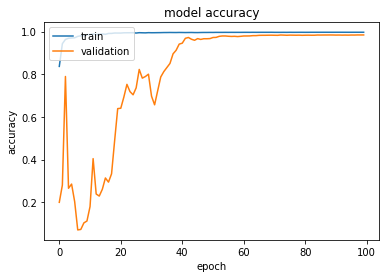

In [ ]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

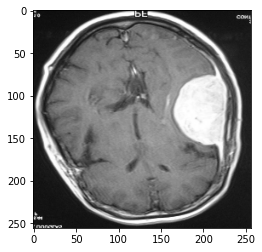

In [ ]:
img =  cv2.imread('/content/drive/MyDrive/Brain tumor/validate/validate/y54.jpg', cv2.IMREAD_COLOR) 
test_img = cv2.resize(img, (256,256))
test_img = cv2.cvtColor(test_img, cv2.IMREAD_COLOR)
plt.imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)

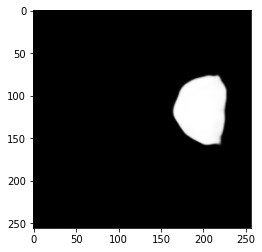

In [ ]:
prediction = model.predict(test_img)
prediction_image = prediction.reshape((256,256))
plt.imshow(prediction_image, cmap='gray')

# **Loss-.bce_jaccard_loss**

In [ ]:
model1 = sm.Unet(BACKBONE, input_shape=(256,256,3), encoder_weights='imagenet')
model1.compile('Adam', loss=sm.losses.bce_jaccard_loss, metrics=['accuracy',MeanIoU(num_classes=2)],)

model1.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 256, 256, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_34 (ZeroPadding2 (None, 262, 262, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 128, 128, 64) 9408        zero_padding2d_34[0][0]          
____________________________________________________________________________________________

In [ ]:
history1 = model1.fit(
    x=train_x,
    y=train_y,
    batch_size=20,
    verbose = 1,
    epochs=100,
    validation_data=(test_x, test_y),
    #callbacks=callbacks_list
)

Epoch 1/100
3/3 [==============================] - 7s 721ms/step - loss: 1.5927 - accuracy: 0.7222 - mean_io_u_1: 1.0000 - val_loss: 1.5596 - val_accuracy: 0.6430 - val_mean_io_u_1: 1.0000
Epoch 2/100
3/3 [==============================] - 1s 295ms/step - loss: 1.4265 - accuracy: 0.9311 - mean_io_u_1: 1.0000 - val_loss: 17.1234 - val_accuracy: 0.0289 - val_mean_io_u_1: 0.4699
Epoch 3/100
3/3 [==============================] - 1s 296ms/step - loss: 1.3141 - accuracy: 0.9624 - mean_io_u_1: 0.4749 - val_loss: 18.6688 - val_accuracy: 0.0354 - val_mean_io_u_1: 0.4618
Epoch 4/100
3/3 [==============================] - 1s 298ms/step - loss: 1.2439 - accuracy: 0.9627 - mean_io_u_1: 0.4664 - val_loss: 21.0186 - val_accuracy: 0.0843 - val_mean_io_u_1: 0.4616
Epoch 5/100
3/3 [==============================] - 1s 295ms/step - loss: 1.1997 - accuracy: 0.9635 - mean_io_u_1: 0.4653 - val_loss: 7.4124 - val_accuracy: 0.5554 - val_mean_io_u_1: 0.4657
Epoch 6/100
3/3 [==============================] - 1

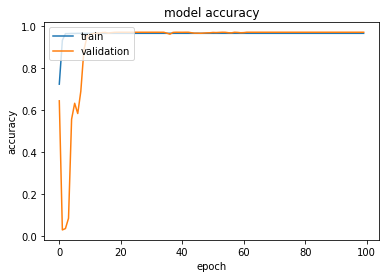

In [ ]:
#  "Accuracy"
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

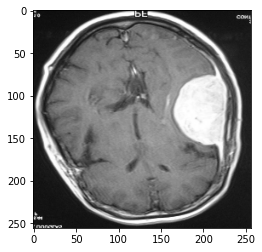

In [ ]:
img =  cv2.imread('/content/drive/MyDrive/Brain tumor/validate/validate/y54.jpg', cv2.IMREAD_COLOR) 
test_img = cv2.resize(img, (256,256))
test_img = cv2.cvtColor(test_img, cv2.IMREAD_COLOR)
plt.imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)

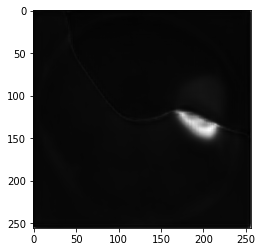

In [ ]:
prediction = model1.predict(test_img)
prediction_image = prediction.reshape((256,256))
plt.imshow(prediction_image, cmap='gray')

In [ ]:
model.save_weights('/content/drive/MyDrive/Brain tumor/model/model_y_p.h5')

In [ ]:
save_path = '/content/drive/MyDrive/BRAIN/model/improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5'
checkpoint = ModelCheckpoint(save_path,monitor='val_accuracy', verbose=1,save_best_onlt=True,mode='max')
callbacks_list=[checkpoint]